In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import os

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import STL


In [2]:
filename = "../data/Alcohol_Sales.csv"
img_path = '../plots/exploratory/'

In [3]:
df_sales = pd.read_csv(filename, parse_dates=['DATE'])
display(df_sales.head)
display(df_sales.describe())

<bound method NDFrame.head of           DATE  S4248SM144NCEN
0   1992-01-01            3459
1   1992-02-01            3458
2   1992-03-01            4002
3   1992-04-01            4564
4   1992-05-01            4221
..         ...             ...
320 2018-09-01           12396
321 2018-10-01           13914
322 2018-11-01           14174
323 2018-12-01           15504
324 2019-01-01           10718

[325 rows x 2 columns]>

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [4]:
#df_sales.index = pd.DatetimeIndex(df_sales['DATE'].dt.date)
#df_sales = df_sales.drop(['DATE'], axis=1)
df_plot = df_sales.copy()
df_plot.index = df_plot['DATE']
df_plot = df_plot.drop(['DATE'], axis=1)

df_sales['year_month'] = df_sales['DATE'].dt.to_period('M') # display only year and month
df_sales.index = df_sales['year_month']
df_sales = df_sales.drop(['DATE', 'year_month'], axis=1)



In [5]:
df_plot.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [6]:
df_sales = df_sales.reindex(pd.period_range(df_sales.index.min(), df_sales.index.max(), freq='M'))
df_sales.index = df_sales.index.rename('time')
display(df_sales)
display(df_sales.describe())
#df_sales.index.dtype
#display(df_sales.dtypes)
df_sales = df_sales.rename(columns={"S4248SM144NCEN": "Sales"})
sales_title = df_sales.columns[0]


,S4248SM144NCEN
time,
1992-01,3459
1992-02,3458
1992-03,4002
1992-04,4564
1992-05,4221
...,...
2018-09,12396
2018-10,13914
2018-11,14174


,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [7]:
df_sales.isna().sum()

Sales    0
dtype: int64

In [8]:
df_sales_data = df_sales.copy()

,Sales
time,
1992-01,NaN
1992-02,NaN
1992-03,6.564289e+04
1992-04,2.094307e+05
1992-05,1.871726e+05
...,...
2018-09,2.212357e+06
2018-10,2.317895e+06
2018-11,2.446203e+06


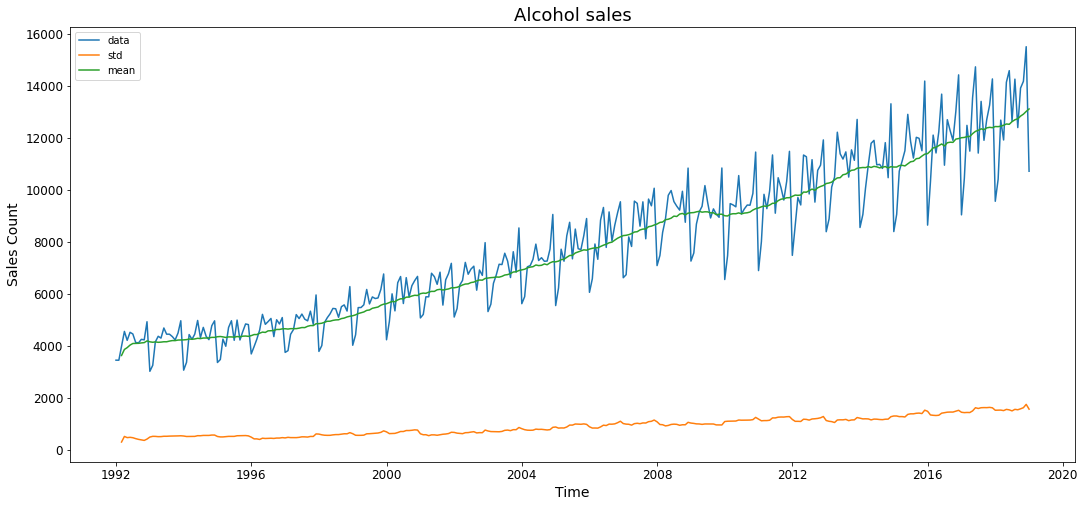

In [9]:
display(df_sales_data.rolling(12, min_periods=3).var(ddof=0))
plt.figure(figsize=(18, 8), facecolor='w')
plt.plot(df_plot.index, df_sales_data[sales_title], label='data')
plt.plot(df_plot.index, df_sales_data.rolling(12, min_periods=3).std(), label='std')
plt.plot(df_plot.index, df_sales_data.rolling(12, min_periods=3).mean(),label='mean')
plt.title('Alcohol sales', fontsize=18)
plt.ylabel("Sales Count", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend()
store_name = 'sales_data'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()

## Exploring the data

<Figure size 864x576 with 0 Axes>

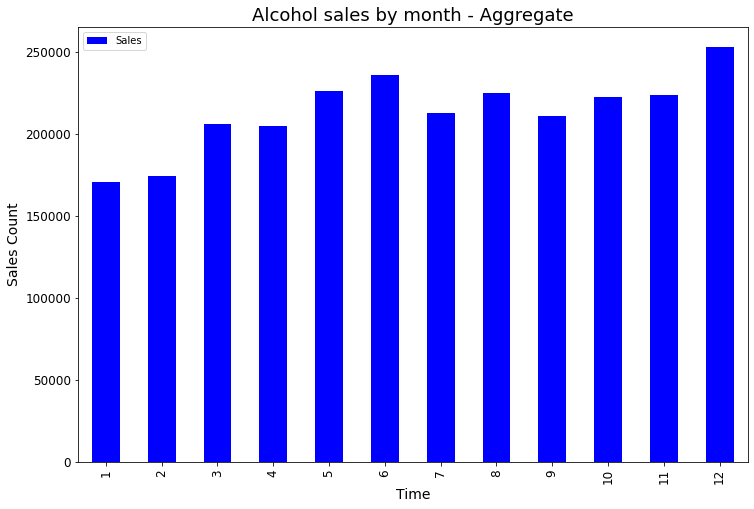

In [10]:


# Bar plot of sales per month

plt.figure(figsize = (12,8), facecolor='w')
df_sales_data.groupby(by=[df_sales_data.index.month]).sum().plot(kind='bar', color='blue', label='sales', figsize=(12,8), legend=True)
plt.title('Alcohol sales by month - Aggregate', fontsize=18)
plt.ylabel("Sales Count", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend()
store_name = 'sales_by_month'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()

<Figure size 864x576 with 0 Axes>

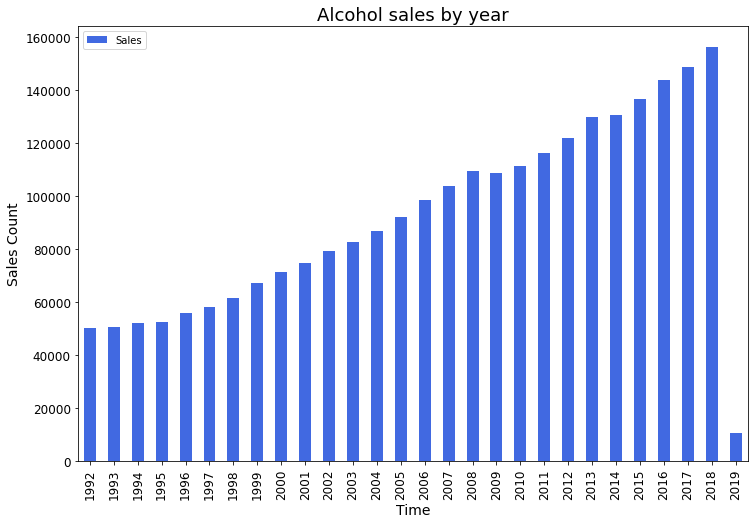

In [11]:
plt.figure(figsize = (12,8), facecolor='w')
df_sales_data.groupby(by=[df_sales_data.index.year]).sum().plot(kind='bar', color='royalblue', label='sales', figsize=(12,8), legend=True)
plt.title('Alcohol sales by year', fontsize=18)
plt.ylabel("Sales Count", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend()
store_name = 'sales_by_year'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()

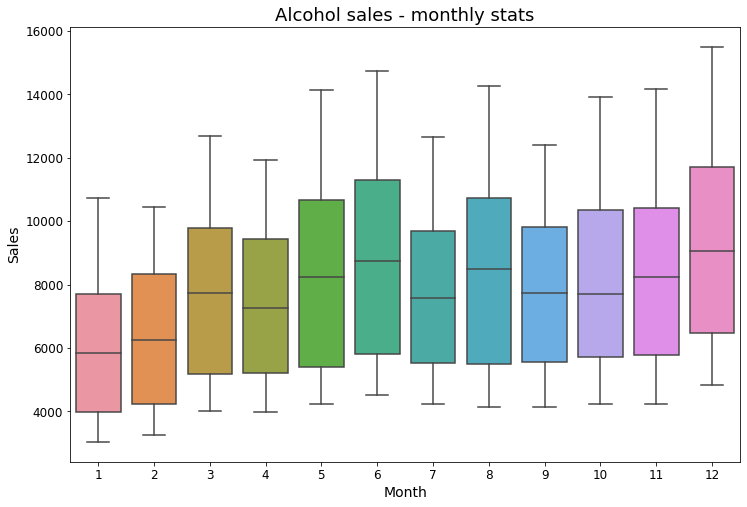

In [12]:
df_sales_data['month'] = df_sales_data.index.month
plt.figure(figsize=(12, 8), facecolor='w')
sns.boxplot(data=df_sales_data, x='month', y=sales_title)
plt.title("Alcohol sales - monthly stats", fontsize=18)
plt.ylabel("Sales",fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
#plt.legend()
store_name = 'sales_monthly_stats'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()
#df_sales_data

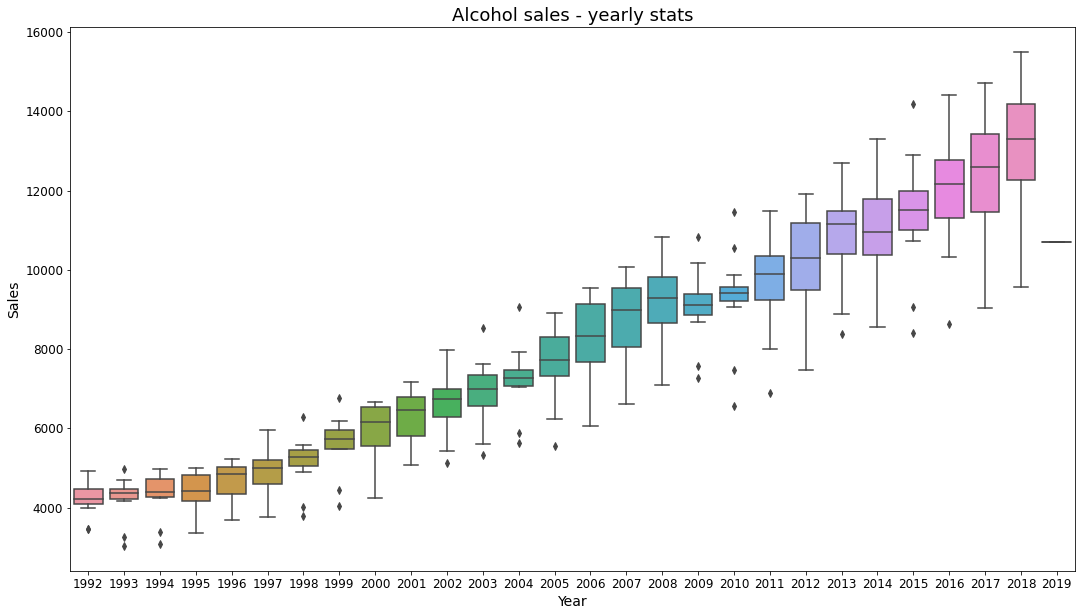

In [13]:
df_sales_data['year'] = df_sales_data.index.year
plt.figure(figsize=(18, 10), facecolor='w')
sns.boxplot(data=df_sales_data, x='year', y=sales_title)
plt.title("Alcohol sales - yearly stats", fontsize=18)
plt.ylabel("Sales",fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
#plt.legend()
store_name = 'sales_yearly_stats'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()

In [14]:
df_sales.head()

,Sales
time,
1992-01,3459
1992-02,3458
1992-03,4002
1992-04,4564
1992-05,4221


## Autocorrelation

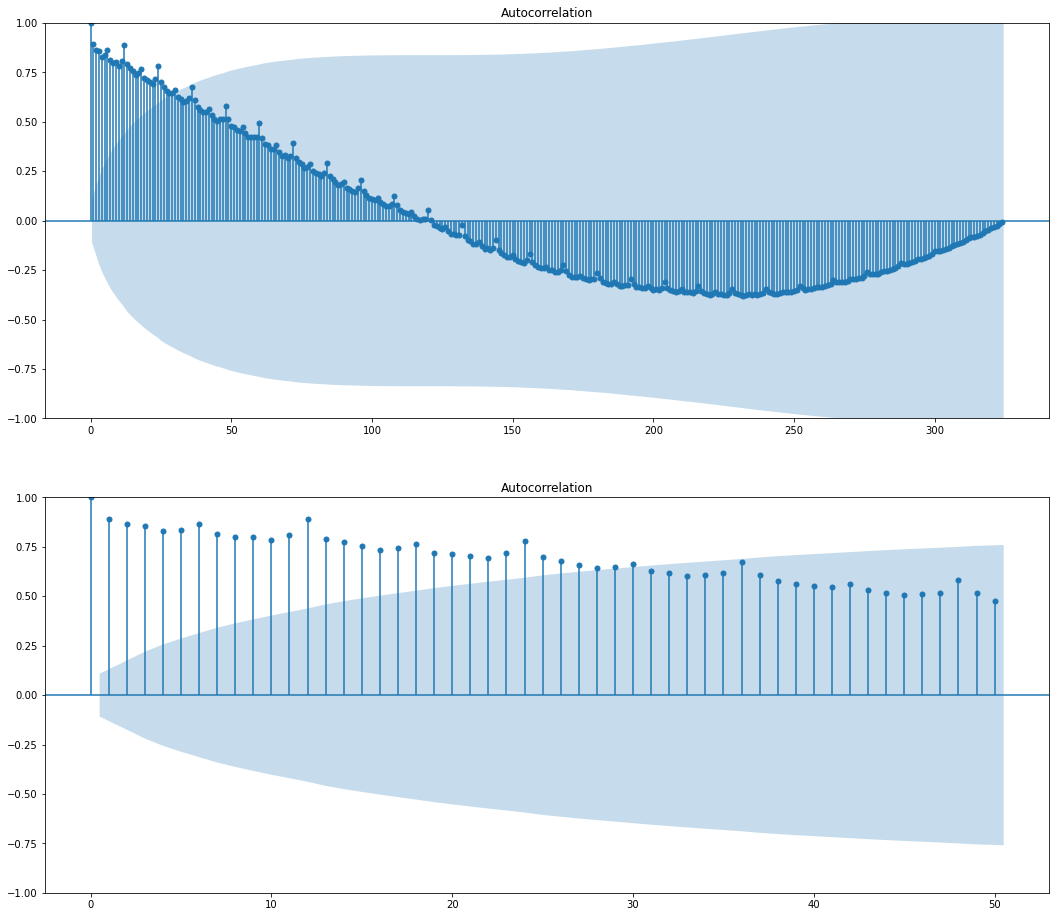

In [15]:
df_sales_stats = df_sales.copy()
auto_corr = df_sales_stats.corr() # equals 1
fig = plt.figure(figsize=(18,16), facecolor='w')
ax1 = fig.add_subplot(211)
fig = plot_acf(df_sales_stats, lags=324, ax=ax1)   # plotting autocorrelation
ax2 = fig.add_subplot(212)
fig = plot_acf(df_sales_stats, lags=50, ax=ax2)

store_name = 'autocorrelation'
file_name = store_name + '.png'
fig.savefig(os.path.join(img_path, file_name))
plt.show()

# The plots suggest a non-stationary data

## Partial autocorrelation

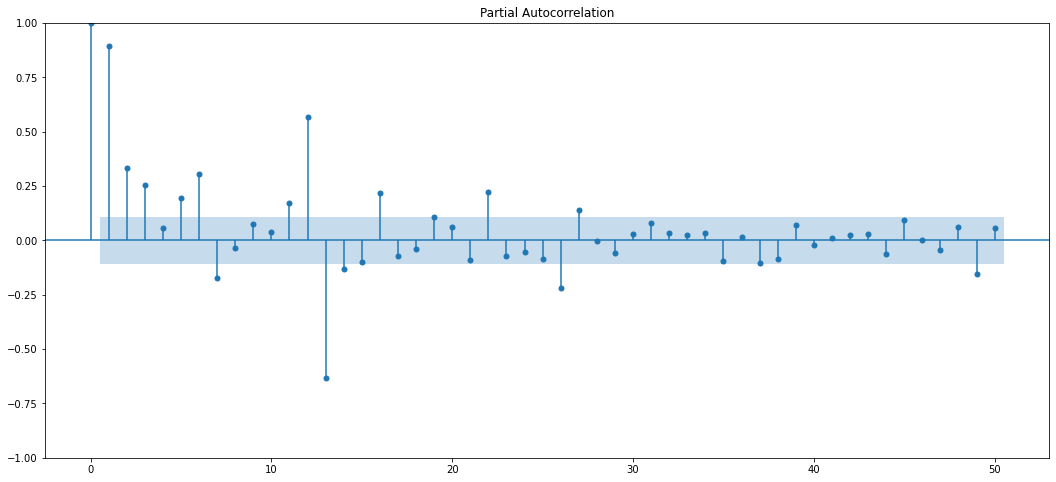

In [16]:
fig = plt.figure(figsize=(18,8), facecolor='w')
ax = fig.add_subplot(111)
fig = plot_pacf(df_sales_stats, lags=50, method="ywm", ax=ax )
store_name = 'partial_autocorr'
file_name = store_name + '.png'
fig.savefig(os.path.join(img_path, file_name))
plt.show()

In [17]:
df_sales_stats.head()

,Sales
time,
1992-01,3459
1992-02,3458
1992-03,4002
1992-04,4564
1992-05,4221


# Time Series Analysis - Decomposition

In [18]:
idx = df_sales_stats.index
df_sales_stats = df_sales.copy()
df_sales_stats.index = df_sales_stats.index.to_timestamp()

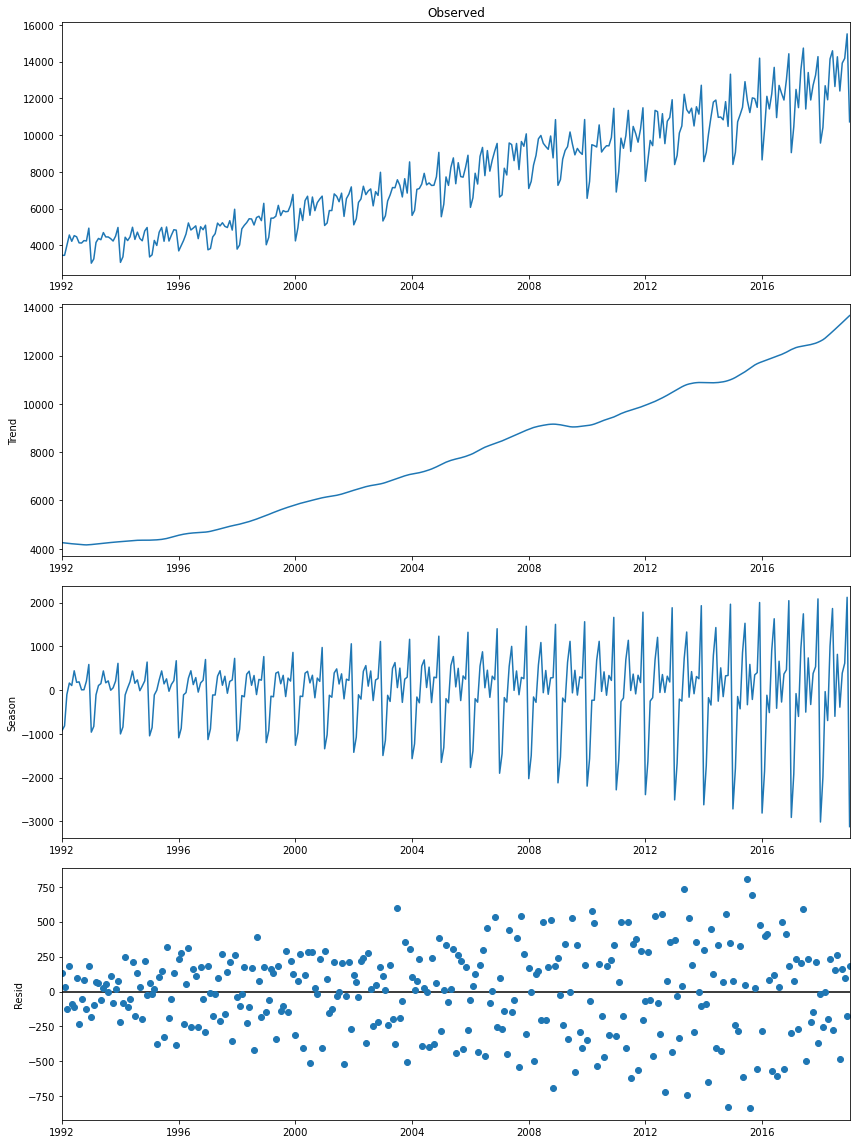

In [19]:
stl = STL(df_sales_stats, seasonal=13)
#fig = plt.figure(figsize=(18,8), facecolor='w')
#ax1 = fig.add_subplot(211)
res = stl.fit()
plt.rcParams["figure.figsize"] = (12,16)
res.plot()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
store_name = 'decomposition'
file_name = store_name + '.png'
plt.savefig(os.path.join(img_path, file_name))
plt.show()

In [20]:
df_sales_stats.head()

,Sales
time,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


# Analysis
The decomposition plot shows that there is a trend and seasonality in the data. The trend plot (second one) highlight
a long-term increase of sales as time goes by. The seasonal component (third plot) reveals that there is a seasonal trend.
The length of seasonality appears to be one year, or 12 months. The seasonality is also noticed on the ACF (autocorrelation)
plot where there is increased values at intervals equaling to 12 lags compared to neighboring lags. The curve of the seasonal
component has an increasing amplitude along the years. This may signal a slight increase in variance. The presence of 
seasonality and trend leads to the conclusion that the data is non-stationary.